In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [6]:
print(customers.head())
print(products.head())
print(transactions.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [7]:
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

print(customers.duplicated().sum())
print(products.duplicated().sum())
print(transactions.duplicated().sum())


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
0
0
0


In [8]:
print(customers.info())
print(products.info())
print(transactions.info())

print(customers.describe())
print(products.describe())
print(transactions.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

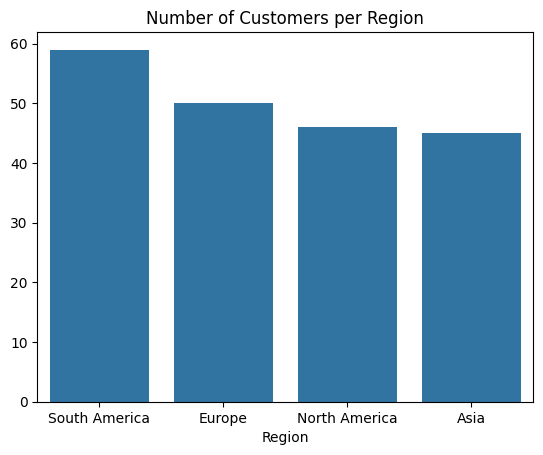

In [9]:
region_counts = customers['Region'].value_counts()
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title('Number of Customers per Region')
plt.show()

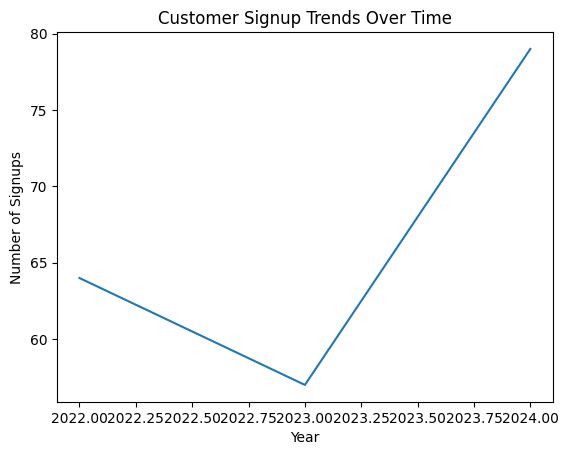

In [11]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
signup_trends = customers['SignupDate'].dt.year.value_counts().sort_index()
plt.plot(signup_trends.index, signup_trends.values)
plt.title('Customer Signup Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.show()


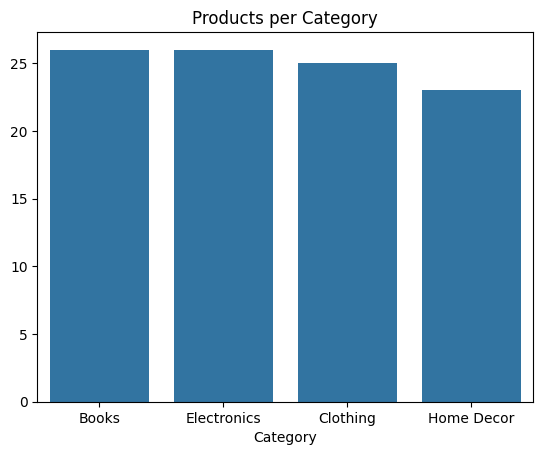

In [12]:
category_counts = products['Category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Products per Category')
plt.show()


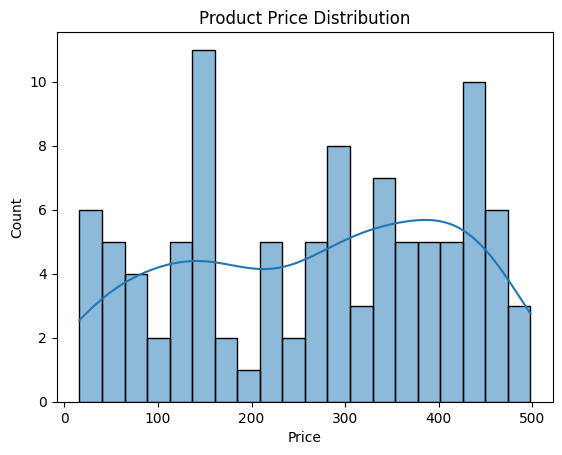

In [13]:
sns.histplot(products['Price'], bins=20, kde=True)
plt.title('Product Price Distribution')
plt.show()


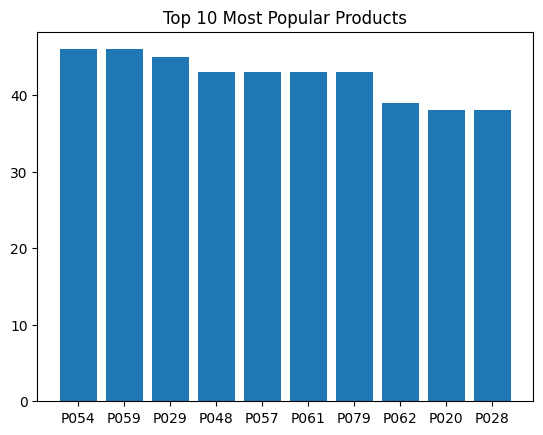

In [14]:
popular_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False)
top_10_products = popular_products.head(10)
plt.bar(top_10_products.index, top_10_products.values)
plt.title('Top 10 Most Popular Products')
plt.show()


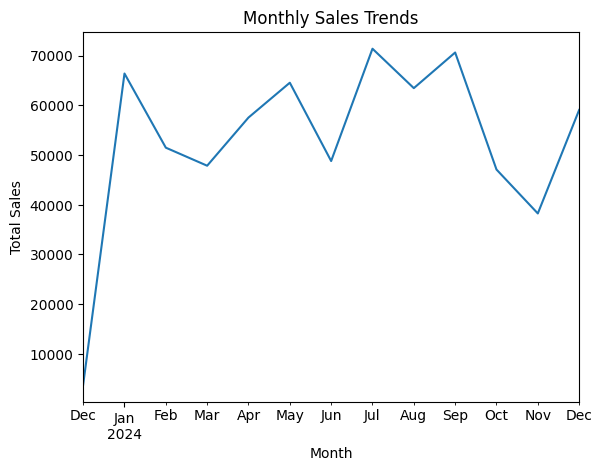

In [15]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
monthly_sales = transactions.groupby(transactions['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
monthly_sales.plot(kind='line', title='Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


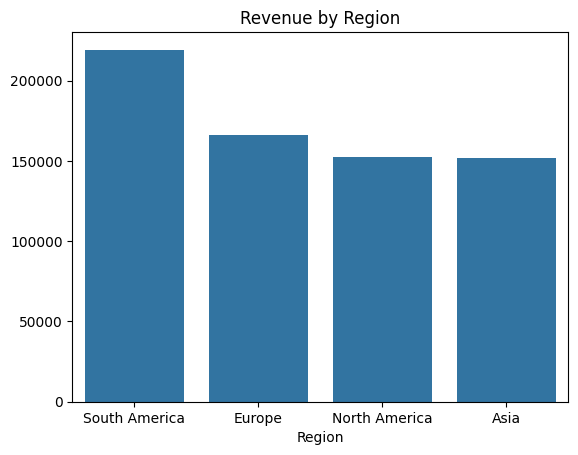

In [16]:
merged_data = transactions.merge(customers, on='CustomerID')
region_revenue = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
sns.barplot(x=region_revenue.index, y=region_revenue.values)
plt.title('Revenue by Region')
plt.show()
